# <a id='toc1_'></a>[COVID-19 Prediction](#toc0_)

Sam Celarek  
Data Science   
scelarek@gmail.com  

June 4th, 2023


**Table of contents**<a id='toc0_'></a>    
- [COVID-19 Prediction](#toc1_)    
- [1. Introduction](#toc2_)    
  - [1.1. Key Questions](#toc2_1_)    
- [2. Setup and Data Collection](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[1. Introduction](#toc0_)

In this project, we will perform a set of analyses on the relationship between different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location. 


## <a id='toc2_1_'></a>[1.1. Key Questions](#toc0_)

## <a id='toc2_1_'></a>[1.2. Data Sources and Methods](#toc0_)


# <a id='toc3_'></a>[2. Setup and Data Collection](#toc0_)

We will be utilizing the cleaned mosquito tracking data from the city of Chicago, Illinois, spanning from 2008 to 2019 provided [here](link_to_dataset). This section will include the necessary libraries and modules for the analysis, as well as the data preparation steps.


In [19]:
from my_code import *

In [20]:
import covsirphy as cs

print(f"Covsirphy version: {cs.__version__}")


Covsirphy version: 3.0.0


In [21]:
# initialize styling params
np.random.seed(123)

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.size"] = 11.0
plt.rcParams["figure.figsize"] = (9, 6)

sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("viridis")

pd.set_option("display.max_columns", 50)
pd.set_option('display.max_colwidth', 1000)
pd.plotting.register_matplotlib_converters()
os.environ["PYTHONHASHSEED"] = "123"

cs.config.logger(level=2)

## CovSIRPhy Dataset

In [22]:
eng = cs.DataEngineer()
eng.download(databases=["covid19dh", "owid", "wpp"])


In [23]:
eng.all().query('ISO3 == "USA"').info()


<class 'pandas.core.frame.DataFrame'>
Index: 1421 entries, 292322 to 293742
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ISO3                                 1421 non-null   category      
 1   Province                             1421 non-null   category      
 2   City                                 1421 non-null   category      
 3   Date                                 1421 non-null   datetime64[ns]
 4   Cancel_events                        1094 non-null   Float64       
 5   Confirmed                            1158 non-null   Float64       
 6   Contact_tracing                      1094 non-null   Float64       
 7   Country                              1273 non-null   string        
 8   Fatal                                1158 non-null   Float64       
 9   Gatherings_restrictions              1094 non-null   Float64       
 10  Informatio

In [24]:
eng.all().query('ISO3 == "USA"').head()

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,Population,Product,Recovered,School_closing,Stay_home_restrictions,Stringency_index,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
292322,USA,-,-,1950-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,148281550.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
292323,USA,-,-,1951-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,150598453.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
292324,USA,-,-,1952-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,152941727.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
292325,USA,-,-,1953-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,155451199.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
292326,USA,-,-,1954-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,158205873.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [25]:
eng.all().query('ISO3 == "USA"').describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1421,2022-02-22 18:12:24.827586048,1950-07-01 00:00:00,2020-10-14 00:00:00,2021-10-04 00:00:00,2022-09-24 00:00:00,2100-07-01 00:00:00,NaN
Cancel_events,1094.0,-1.30713,-2.0,-2.0,-2.0,0.0,0.0,0.865526
Confirmed,1158.0,47597456.107081,1.0,9732256.75,37757320.5,84917946.75,103910034.0,36696007.752079
Contact_tracing,1094.0,0.983547,0.0,1.0,1.0,1.0,1.0,0.127269
Fatal,1158.0,630068.220207,0.0,235646.0,628192.5,1005825.5,1135343.0,379009.304429
Gatherings_restrictions,1094.0,-2.588665,-4.0,-4.0,-4.0,0.0,0.0,1.747276
Information_campaigns,1094.0,1.866545,0.0,2.0,2.0,2.0,2.0,0.499328
Internal_movement_restrictions,1094.0,-1.194698,-2.0,-2.0,-1.0,-1.0,1.0,0.940853
International_movement_restrictions,1094.0,3.292505,0.0,3.0,3.0,4.0,4.0,0.743621
Population,1421.0,325187059.007037,148281550.0,326687501.0,326687501.0,326687501.0,394041155.0,26059352.521625


In [26]:
# This is a preprovided cleaning function of the engineer class from corsirphy
# convert date

eng.clean(kinds=['convert_date', 'resample', 'fillna'], date_range=('2020-01-01', '2022-09-15'))
eng.all().query('ISO3 == "USA"').info()
numeric_columns_assessment(eng.all().query('ISO3 == "USA"'))



<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 215849 to 216835
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ISO3                                 987 non-null    category      
 1   Province                             987 non-null    category      
 2   City                                 987 non-null    category      
 3   Date                                 987 non-null    datetime64[ns]
 4   Cancel_events                        987 non-null    Float64       
 5   Confirmed                            987 non-null    Float64       
 6   Contact_tracing                      987 non-null    Float64       
 7   Country                              987 non-null    object        
 8   Fatal                                987 non-null    Float64       
 9   Gatherings_restrictions              987 non-null    Float64       
 10  Information

ValueError: Length of values (8) does not match length of index (7)

In [ ]:
eng.transform()
eng.all().query('ISO3 == "USA"').info()
eng.all().query('ISO3 == "USA"').head()


<class 'pandas.core.frame.DataFrame'>
Index: 54788 entries, 12109732 to 12164519
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ISO3                                 54788 non-null  category      
 1   Province                             54788 non-null  category      
 2   City                                 54788 non-null  category      
 3   Date                                 54788 non-null  datetime64[ns]
 4   Cancel_events                        54788 non-null  Float64       
 5   Confirmed                            54788 non-null  Float64       
 6   Contact_tracing                      54788 non-null  Float64       
 7   Country                              54788 non-null  object        
 8   Fatal                                54788 non-null  Float64       
 9   Gatherings_restrictions              54788 non-null  Float64       
 10  Infec

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,Infected,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,Population,Product,Recovered,School_closing,Stay_home_restrictions,Stringency_index,Susceptible,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
12109732,USA,-,-,1950-07-01,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,148281550.0,0,0.0,0.0,0.0,0.0,148281550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12109733,USA,-,-,1950-07-02,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,148281550.0,0,0.0,0.0,0.0,0.0,148281550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12109734,USA,-,-,1950-07-03,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,148281550.0,0,0.0,0.0,0.0,0.0,148281550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12109735,USA,-,-,1950-07-04,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,148281550.0,0,0.0,0.0,0.0,0.0,148281550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12109736,USA,-,-,1950-07-05,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,148281550.0,0,0.0,0.0,0.0,0.0,148281550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

eng.diff(column="Confirmed", suffix="_diff", freq="D")
eng.add(columns=["Fatal", "Recovered"])
# Division
eng.div(numerator="Confirmed", denominator="Tests", new="Positive_rate")

eng.all().query('ISO3 == "USA"').info()
eng.all().query('ISO3 == "USA"').head()

In [ ]:
# dddddddd
with_df, status, status_dict = eng.subset(geo="USA", start_date='2020-01-01', end_date='2022-09-15', complement=True)
print(f"{status}\n")
print(status_dict)
with_df.info()
with_df.head()

monotonic increasing complemented confirmed data and 
monotonic increasing complemented fatal data and 
fully complemented recovered data

{'Monotonic_confirmed': True, 'Monotonic_fatal': True, 'Monotonic_recovered': False, 'Full_recovered': True, 'Partial_recovered': False}
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 987 entries, 2020-01-03 to 2022-09-15
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Cancel_events                                               987 non-null    Float64
 1   Confirmed_diff                                              987 non-null    Float64
 2   Contact_tracing                                             987 non-null    Float64
 3   Fatal+Recovered                                             987 non-null    Int64  
 4   Gatherings_restrictions                                     9

,Cancel_events,Confirmed_diff,Contact_tracing,Fatal+Recovered,Gatherings_restrictions,Infected,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,Population,Positive_rate,School_closing,Stay_home_restrictions,Stringency_index,Susceptible,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing,Confirmed,Fatal,Recovered,Country_United States,Product_0,"Product_Johnson&Johnson, Moderna, Novavax, Pfizer/BioNTech"
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,NaN,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-04,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,NaN,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-05,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,NaN,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-06,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,NaN,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-07,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,NaN,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0


In [ ]:
dddddd
# """
# Cell generated by Data Wrangler.
# """
# def clean_data(with_df):
#     # Replace all instances of 0 with 0 in column: 'Positive_rate'
#     with_df.loc[with_df['Positive_rate'] != with_df['Positive_rate'], 'Positive_rate'] = 0
#     with_df.loc[with_df['Positive_rate'] == np.inf, 'Positive_rate'] = 0
#     return with_df

# with_df_clean = clean_data(with_df.copy())
# with_df_clean.head()

,Cancel_events,Confirmed_diff,Contact_tracing,Fatal+Recovered,Gatherings_restrictions,Infected,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,Population,Positive_rate,School_closing,Stay_home_restrictions,Stringency_index,Susceptible,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing,Confirmed,Fatal,Recovered,Country_United States,Product_0,"Product_Johnson&Johnson, Moderna, Novavax, Pfizer/BioNTech"
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-04,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-05,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-06,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
2020-01-07,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,326687501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0


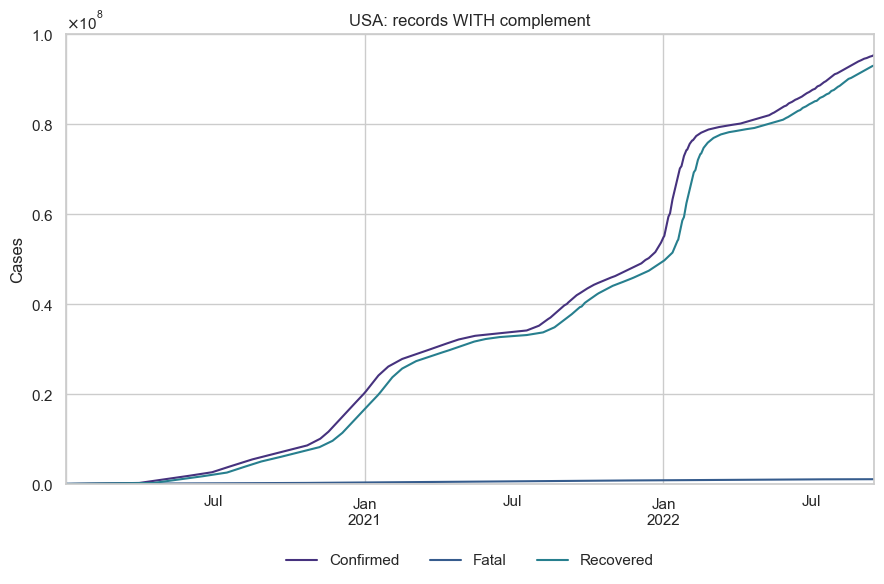

In [ ]:
# cs.line_plot(with_df[["Confirmed", "Fatal", "Recovered"]], title="USA: records WITH complement")

In [ ]:
# with_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 987 entries, 2020-01-03 to 2022-09-15
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Cancel_events                                               987 non-null    Float64
 1   Confirmed_diff                                              987 non-null    Float64
 2   Contact_tracing                                             987 non-null    Float64
 3   Fatal+Recovered                                             987 non-null    Int64  
 4   Gatherings_restrictions                                     987 non-null    Float64
 5   Infected                                                    987 non-null    Int64  
 6   Information_campaigns                                       987 non-null    Float64
 7   Internal_movement_restrictions                              987 non-nu

In [ ]:
snr_act = cs.ODEScenario.auto_build(geo="USA", model=cs.SIRFModel, complement=True)

snr_act

c:\ProgramData\Anaconda3\lib\site-packages\covsirphy\dynamics\_trend.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_df[self.num2str(i)] = self._linear_f(phase_df[r], a=param[0], b=param[1])
c:\ProgramData\Anaconda3\lib\site-packages\covsirphy\dynamics\_trend.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_df[self.num2str(i)] = self._linear_f(phase_df[r], a=param[0], b=param[1])
c:\ProgramData\Anaconda3\lib\site-packages\covsirphy\dynamics\_trend.py:98: PerformanceWarning: DataFrame is highly fragmented.  This 

  0%|          | 0/114 [00:00<?, ?it/s]

KeyboardInterrupt: 

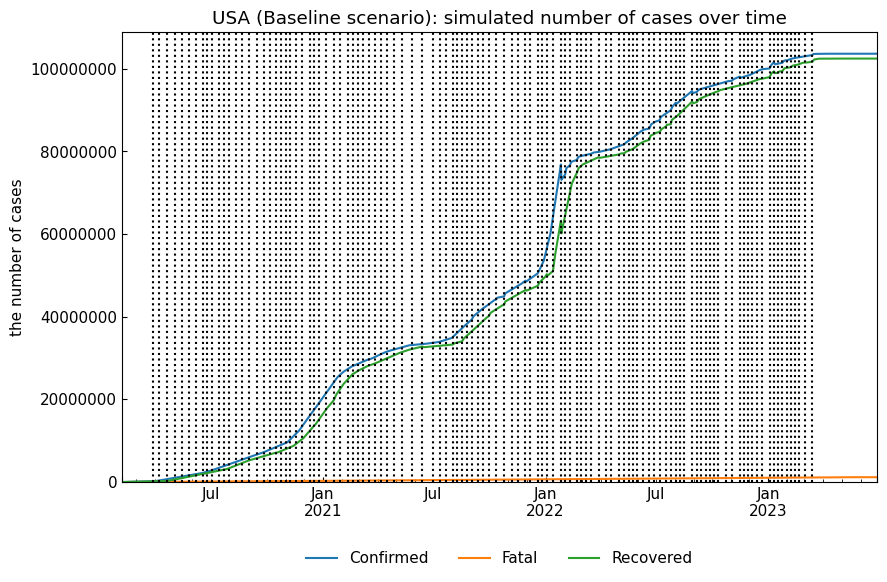

In [ ]:
snr_act.simulate(name="Baseline");

,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day]
Phase,,,,,,,,,,,
0th,2020-02-07,2020-03-28,10.11,0.000752,0.000078,0.002722,0.000191,0.001,213,6,87
1st,2020-03-29,2020-04-07,10.59,0.000687,0.000093,0.002091,0.000104,0.001,179,8,160
2nd,2020-04-08,2020-04-20,1.68,0.000615,0.000082,0.001191,0.000628,0.001,204,14,27
3rd,2020-04-21,2020-05-02,0.99,0.008784,0.000062,0.001081,0.001017,0.009,267,15,16
4th,2020-05-03,2020-05-14,0.77,0.002436,0.000062,0.000865,0.001064,0.002,267,19,16
...,...,...,...,...,...,...,...,...,...,...,...
109th,2023-02-07,2023-02-13,1.49,0.01254,0.0,0.002245,0.001486,0.013,37117,7,11
110th,2023-02-14,2023-02-20,1.7,0.001784,0.000009,0.001305,0.000756,0.002,1894,13,22
111th,2023-02-21,2023-03-01,1.63,0.001044,0.000003,0.002279,0.00139,0.001,4890,7,12


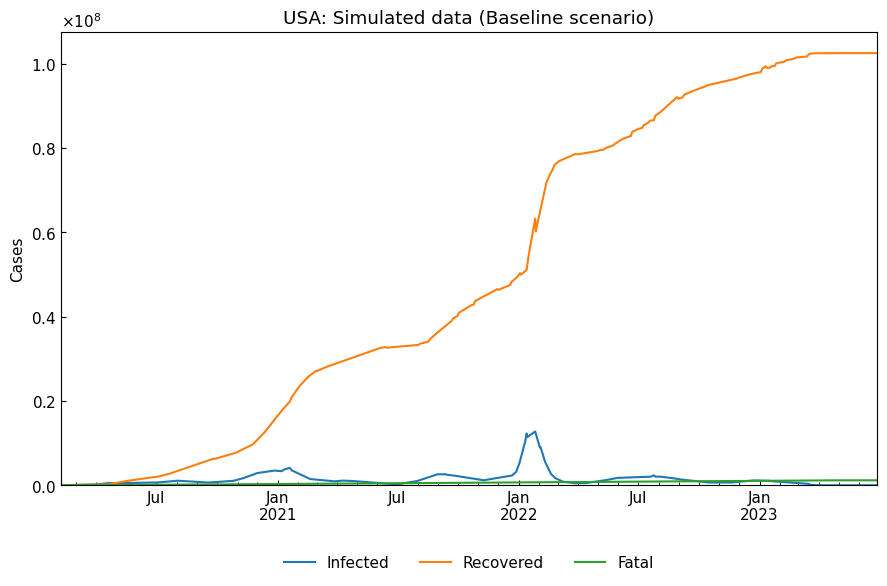

In [ ]:
dyn_act = snr_act.to_dynamics(name="Baseline")
# Show summary
display(dyn_act.summary())
# Simulation
dyn_act_df = dyn_act.simulate(model_specific=False)
cs.line_plot(
    dyn_act_df.drop("Susceptible", axis=1), "USA: Simulated data (Baseline scenario)")

## Google Dataset

In [ ]:
# folder_holder = "C://Users/Samsickle/Documents/Universal_Code_Bank/BrainStation_Capstone/Data/"


# # # # time series data
# epid_df = pd.read_csv(f'{folder_holder}epidemiology.csv') # 1
# hospitalizations_df = pd.read_csv(f'{folder_holder}hospitalizations.csv') # 2
# vac_df = pd.read_csv(f'{folder_holder}vaccinations.csv') # 3
# mobility_df = pd.read_csv(f'{folder_holder}mobility.csv') # 4
# gov_response_df = pd.read_csv(f'{folder_holder}oxford-government-response.csv') # 5
# weather_df = pd.read_csv(f'{folder_holder}weather.csv') # 6

# timeland_df = [epid_df, hospitalizations_df, mobility_df, vac_df, gov_response_df, weather_df]





FileNotFoundError: [Errno 2] No such file or directory: '/Users/samcelarek/Documents/GitHub/Universal_Code_Bank/BrainStation_Capstone/Capstone/C://Users/Samsickle/Documents/Universal_Code_Bank/BrainStation_Capstone/Data/epidemiology.csv'

In [ ]:
# """
# Cell generated by Data Wrangler.
# """
# def clean_data(df):
#     # Filter rows based on column: 'location_key'
#     # df = df[df['location_key'].str.contains(r"^(US|CA|DE|GB|FR|JP|AU|BR|ZA|IN)$", na=False)]
#     df = df[df['location_key'].str.contains(r"^(US)$", na=False)] # only the us to start

#     # Change column type to datetime64[ns] for column: 'date'
#     try:
#         df = df.astype({'date': 'datetime64[ns]'})
#     except:
#         pass
#     # Change column type to category for column: 'location_key'
#     df = df.astype({'location_key': 'category'})
#     return df


# time_series_dfs = list(map(clean_data, timeland_df))

# # # Assume dfs is your list of dataframes
# time_series_dfs = reduce(lambda left,right: pd.merge(left,right,on=['location_key', 'date'], how='left'), time_series_dfs).copy()


In [ ]:
# time_series_dfs.to_parquet(f'{folder_holder}time_series_dfs.parquet.gzip', compression='gzip')

# time_series_dfs = pd.read_parquet(f'{folder_holder}time_series_dfs.parquet.gzip')

In [ ]:
# time_series_dfs_line_plot = time_series_dfs.dropna(subset='new_confirmed').copy()
# # sns.lineplot(data = time_series_dfs_line_plot, x = 'date', y = 'new_confirmed')

# time_series_dfs_line_plot.plot(x = 'date', y = 'new_confirmed', figsize = (15, 10))

# # add lines for each column
# fig = px.line(time_series_dfs_line_plot, x=air_traffic.index, y=air_traffic.columns,)

# # axis labels and title
# fig.update_layout(
#     yaxis_title="Passenger-miles (billions)", 
#     legend_title="", 
#     title="Daily air travel from 1979 to 2002"
# )

# # activate slider
# fig.update_xaxes(rangeslider_visible=True)

# fig.show()

In [ ]:
# folder_holder = "C://Users/Samsickle/Documents/BrainStation_Capstone/Data/"
# # C:\Users\Samsickle\Documents\BrainStation_Capstone\Data

# # # # time series data
# # hospitalizations_df = pd.read_csv(f'{folder_holder}hospitalizations.csv') # 2
# # mobility_df = pd.read_csv(f'{folder_holder}mobility.csv') # 4
# # gov_response_df = pd.read_csv(f'{folder_holder}oxford-government-response.csv') # 5
# # weather_df = pd.read_csv(f'{folder_holder}weather.csv') # 6

# epid_df = pd.read_csv(f'{folder_holder}epidemiology.csv') # 1
# # vac_df = pd.read_csv(f'{folder_holder}vaccinations.csv') # 3


In [ ]:
# epid_df.sample(5)

Data Wireframe:

1. Date and Location:
    - 'date' - the day of the observations
    - 'location_key' - the country of the observations. I choose ten countries of interest in different regions

United States (US)  
Canada (CA)  
Germany (DE)  
United Kingdom (GB)  
France (FR)  
Japan (JP)  
Australia (AU)  
Brazil (BR)  
South Africa (ZA)  
India (IN)  
These countries are often used as indicators for their respective regions due to their significant economic influence, political stability, and comprehensive data collection practices.

2. COVID-19 Statistics:
    - 'new_confirmed' (New Positive Cases) - the number of new confirmed cases of COVID-19, this includes some negative numbers to account for data corrections in the previous days, however because these numbers are aggregated accross a whole country, the negative numbers are often very small and remain positive
    - 'new_deceased' (New Deaths) - the number of new deaths due to COVID-19 also shares the negative number problem
    - 'new_hospitalized_patients' (New Hospitalizations) 

3. Mobility Data:
    - 'mobility_retail_and_recreation'
    - 'mobility_grocery_and_pharmacy'
    - 'mobility_parks'
    - 'mobility_transit_stations'
    - 'mobility_workplaces'
    - 'mobility_residential'



4. Vaccination Data:
    - 'new_persons_vaccinated'
    - 'cumulative_persons_vaccinated'
    - 'new_persons_fully_vaccinated'
    - 'cumulative_persons_fully_vaccinated'
    - 'new_vaccine_doses_administered'
    - 'cumulative_vaccine_doses_administered'

5. Policy Measures:
    - 'school_closing'
    - 'workplace_closing'
    - 'cancel_public_events'
    - 'restrictions_on_gatherings'
    - 'public_transport_closing'
    - 'stay_at_home_requirements'
    - 'restrictions_on_internal_movement'
    - 'international_travel_controls'
    - 'income_support'
    - 'debt_relief'
    - 'fiscal_measures'
    - 'international_support'
    - 'public_information_campaigns'
    - 'testing_policy'
    - 'contact_tracing'
    - 'emergency_investment_in_healthcare'
    - 'investment_in_vaccines'
    - 'facial_coverings'
    - 'vaccination_policy'
    - 'stringency_index'

6. Weather Data:
    - 'average_temperature_celsius'
    - 'minimum_temperature_celsius'
    - 'maximum_temperature_celsius'
    - 'rainfall_mm'
    - 'snowfall_mm'
    - 'dew_point'
    - 'relative_humidity'


In [ ]:
# # location dfs
# geography_df = pd.read_csv(f'{folder_holder}geography.csv') #1
# health_df = pd.read_csv(f'{folder_holder}health.csv') #2
# demographics_df = pd.read_csv(f'{folder_holder}demographics.csv') #3
# economics_df = pd.read_csv(f'{folder_holder}economy.csv') #4


# locationland_df = [geography_df, health_df, demographics_df, economics_df]

In [ ]:
# location_df = list(map(clean_data, locationland_df))

# # Assume dfs is your list of dataframes
# location_df = reduce(lambda left,right: pd.merge(left,right,on='location_key', how='left'), location_df).copy()

# location_df.head()


,location_key,openstreetmap_id,latitude,longitude,elevation_m,area_sq_km,area_rural_sq_km,area_urban_sq_km,life_expectancy,smoking_prevalence,...,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,gdp_usd,gdp_per_capita_usd,human_capital_index
0,US,148838.0,39.828175,-98.5795,NaN,9831510.0,8549545.0,802053.0,78.539024,21.8,...,46094075.0,44668270.0,40348397.0,42120077.0,38488170.0,24082597.0,13147182.0,2.137442e+13,65118.0,0.762


In [ ]:

# location_df.to_pickle('../Data/location_df.pkl')
# location_df = pd.read_pickle('../Data/location_df.pkl')

# location_df.sample(3)

ValueError: Cannot take a larger sample than population when 'replace=False'

This dataframe provides a comprehensive snapshot of COVID-19 data, mobility metrics, government restrictions, and weather conditions for specific locations on specific dates. Here's a brief overview of the columns:

1. `Entry ID`: A unique identifier for each row in the dataframe.
2. `Date`: The date for the day on which the data was recorded.
3. `Location Key`: A code representing the location (10 different countries in total) for which the data is reported.

4. `New Confirmed`: The number of new confirmed COVID-19 cases on the given date.
5. `New Deceased`: The number of new COVID-19 related deaths on the given date.
6. `New Recovered`: The number of new recoveries from COVID-19 on the given date.
7. `New Tested`: The number of new COVID-19 tests conducted on the given date.

8. `New Hospitalizations`: The number of new hospitalizations due to COVID-19 on the given date.
9. `Current Hospitalizations`: The total number of current hospitalizations due to COVID-19 on the given date.

10. `New Fully Vaccinated (29+ other Vaccination Columns)`: The number of new fully vaccinated individuals on the given date. There are 29 other columns related to vaccination data here too.

11. `Retail and Recreation Mobility (5+ other Mobility Metrics)`: A measure of mobility in retail and recreation spaces, along with 5 other columns related to different aspects of mobility.

12. `School Closing (19+ other Government Restrictions)`: A measure indicating whether schools were closed on the given date, along with 19 other columns related to different government restrictions.

13. `Average Temp (6+ Other Weather Columns)`: The average temperature on the given date, along with 6 other columns related to different weather conditions.

In total there are 9880 and 82 rows for 6.3mbs of data. The main way I could increase or decrease the size of the dataset would be to include more countries, regions, or counties in the analysis. For now this is my starter df.
